In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:

import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session = Session(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
# reflect the tables
conn = engine.connect()


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

print(measurement)
print(station)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [8]:
# Create our session (link) from Python to the DB
[column for column in measurement.__table__.columns]

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [9]:
# Create our session (link) from Python to the DB
[column for column in station.__table__.columns]

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = most_recent[0]
print(most_recent_date)

2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

#date_string = "2023-09-27"

date_format = "%Y-%m-%d"  # Format of the date string (YYYY-MM-DD)

# Use datetime.strptime() to parse the string and convert it to a datetime object
most_recent_date_d = dt.datetime.strptime(most_recent_date, date_format)
#print(most_recent_date_d)

In [12]:
# Calculate the date one year from the last date in data set.
twelve_months_ago_date = most_recent_date_d - dt.timedelta(days=365)
print(twelve_months_ago_date)

2016-08-23 00:00:00


In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.id, measurement.date, measurement.prcp).\
    filter(measurement.date >= twelve_months_ago_date).\
    order_by(measurement.date).all()

results

[(2364, '2016-08-24', 2.0),
 (5091, '2016-08-24', 54.6),
 (7331, '2016-08-24', 57.9),
 (8825, '2016-08-24', None),
 (11851, '2016-08-24', 31.0),
 (14608, '2016-08-24', 54.6),
 (19202, '2016-08-24', 36.8),
 (2365, '2016-08-25', 2.0),
 (5092, '2016-08-25', 2.0),
 (7332, '2016-08-25', 0.0),
 (8826, '2016-08-25', 0.0),
 (11852, '2016-08-25', 5.3),
 (14609, '2016-08-25', 1.5),
 (19203, '2016-08-25', 2.8),
 (2366, '2016-08-26', 0.0),
 (5093, '2016-08-26', 0.8),
 (7333, '2016-08-26', 0.5),
 (8827, '2016-08-26', 1.0),
 (11853, '2016-08-26', 0.0),
 (14610, '2016-08-26', 0.3),
 (2367, '2016-08-27', 0.0),
 (5094, '2016-08-27', 4.6),
 (7334, '2016-08-27', 0.5),
 (11854, '2016-08-27', 0.0),
 (14611, '2016-08-27', 3.0),
 (19204, '2016-08-27', None),
 (2368, '2016-08-28', 0.3),
 (5095, '2016-08-28', 3.6),
 (7335, '2016-08-28', 3.6),
 (11855, '2016-08-28', 3.6),
 (14612, '2016-08-28', 15.2),
 (19205, '2016-08-28', 52.6),
 (2369, '2016-08-29', 0.0),
 (5096, '2016-08-29', 4.3),
 (7336, '2016-08-29', 1.0

In [14]:
#Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results)
results_df.head()
    


# Sort the dataframe by date
results_df.sort_values("date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data


,id,date,prcp
0,2364,2016-08-24,2.0
1,5091,2016-08-24,54.6
2,7331,2016-08-24,57.9
3,8825,2016-08-24,NaN
4,11851,2016-08-24,31.0
...,...,...,...
2218,19548,2017-08-22,12.7
2221,12186,2017-08-23,2.0
2219,2723,2017-08-23,0.0
2220,7634,2017-08-23,0.0


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,id,prcp
count,2223.000000,2015.000000
mean,10158.397211,4.485112
std,5604.268703,11.690532
min,2364.000000,0.000000
25%,5286.500000,0.000000
50%,8930.000000,0.500000
75%,14750.500000,3.300000
max,19549.000000,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
results_station = session.query(station.station).distinct(station.station).count()
print(results_station)

#results_station = session.query(func.count(measurement.station)).all()
#print(results_station)


9


C:\Users\Lare\AppData\Local\Temp\ipykernel_6368\2247655857.py:2: SADeprecationWarning: DISTINCT ON is currently supported only by the PostgreSQL dialect.  Use of DISTINCT ON for other backends is currently silently ignored, however this usage is deprecated, and will raise CompileError in a future release for all backends that do not support this syntax.
  results_station = session.query(measurement.station).distinct(measurement.station).count()


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

results_station_active = session.query(measurement.station, func.count(measurement.station).label("station_count")
).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
results_station_active



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results_station_most_active = session.query(measurement.station, func.count(measurement.station).label("station_count")
).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first()
#print(results_station_most_active)
most_active_id = results_station_most_active[0]
#print(most_active_id)

summary_active_results = session.query(measurement.id, measurement.station, measurement.tobs).\
    filter(measurement.station == most_active_id).\
    order_by(measurement.date).all()

#print(summary_active_results)


summary_df = pd.DataFrame(summary_active_results)
summary_df.describe()

#mean_temperature = summary_df[["tobs"]].mean()



,id,tobs
count,2772.000000,2772.000000
mean,13572.500000,22.035823
std,800.351798,2.420238
min,12187.000000,12.200000
25%,12879.750000,20.600000
50%,13572.500000,22.200000
75%,14265.250000,23.300000
max,14958.000000,29.400000


In [19]:

temperature_min = summary_df["tobs"].min()
temperature_max = summary_df["tobs"].max()
temperature_average = summary_df["tobs"].mean()
print("Lowest Temperature =  ", str(temperature_min), "\n")
print("Hihghest Temperature =  ", str(temperature_max), "\n")
print("AVerage Temperature =  ", str(temperature_average) )


Lowest Temperature =   12.2 

Hihghest Temperature =   29.4 

AVerage Temperature =   22.035822510822513


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temperature_results_12months = session.query(measurement.id, measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.date >= twelve_months_ago_date,
        measurement.station == most_active_id).\
    order_by(measurement.date.desc()).all()

temperature_results_12months






[(14958, 'USC00519281', '2017-08-18', 26.1),
 (14957, 'USC00519281', '2017-08-17', 24.4),
 (14956, 'USC00519281', '2017-08-16', 24.4),
 (14955, 'USC00519281', '2017-08-15', 25.0),
 (14954, 'USC00519281', '2017-08-14', 25.0),
 (14953, 'USC00519281', '2017-08-13', 25.0),
 (14952, 'USC00519281', '2017-08-06', 28.3),
 (14951, 'USC00519281', '2017-08-05', 27.8),
 (14950, 'USC00519281', '2017-08-04', 25.0),
 (14949, 'USC00519281', '2017-07-31', 24.4),
 (14948, 'USC00519281', '2017-07-30', 27.2),
 (14947, 'USC00519281', '2017-07-29', 27.8),
 (14946, 'USC00519281', '2017-07-28', 27.2),
 (14945, 'USC00519281', '2017-07-27', 24.4),
 (14944, 'USC00519281', '2017-07-26', 23.9),
 (14943, 'USC00519281', '2017-07-25', 25.0),
 (14942, 'USC00519281', '2017-07-24', 23.9),
 (14941, 'USC00519281', '2017-07-23', 27.8),
 (14940, 'USC00519281', '2017-07-22', 25.0),
 (14939, 'USC00519281', '2017-07-21', 25.0),
 (14938, 'USC00519281', '2017-07-20', 25.0),
 (14937, 'USC00519281', '2017-07-19', 24.4),
 (14936, '

[26.1, 24.4, 25.0, 28.3, 27.8, 27.2, 23.9, 26.7, 23.3, 22.2, 20.6, 25.6, 22.8, 21.7, 20.0, 21.1, 19.4, 18.3, 15.6, 18.9, 17.8, 16.7, 16.1, 15.0, 17.2]
[18, 33, 30, 1, 3, 4, 33, 11, 39, 22, 19, 22, 18, 18, 12, 22, 15, 7, 2, 5, 3, 6, 1, 3, 4]


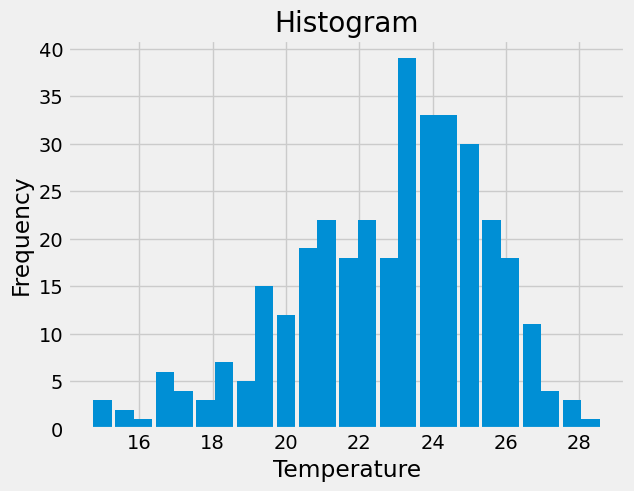

In [21]:
temperature_results_12months = session.query(measurement.id, measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.date >= twelve_months_ago_date,
        measurement.station == most_active_id).\
    order_by(measurement.date.desc()).all()

temperature = []
values = []
frequencies = []

for i in range(len(temperature_results_12months)):
    temperature.append(temperature_results_12months[i][3])      

# Create a histogram using Python's collections.Counter
from collections import Counter
histogram = Counter(temperature)

# Extract keys (values) and frequencies from the histogram
values = list(histogram.keys())
frequencies = list(histogram.values())

print(values)
print(frequencies)

# Create a bar plot
plt.bar(values, frequencies, width=0.5, align='center')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


# printing the frequency
#print(frequency)
#matplotlib.plt.hist(temperature_results_12months)

#fig, ax = plt.subplots(figsize =(10,10))
#ax.hist(temperature_results_12months, bins = [0, 16, 18, 20,22,24,26,28])

#plt.show()

# Close Session

In [22]:
# Close Session
session.close()